### This was project was my atempt to lean the ArcGIS Python API and create a portfolio of GIS work. Unfortunately, I ran out of credits when trying to do anylsis on ~300,000 rows. This project is abandon. 

The goal was to process the .csv file of chicago red light camera violations to create a heat map of the intersectons where violations occured most often and the geocode by intersection the red light violations that had null values for the Lat Long fields. 

In [1]:
from arcgis.gis import GIS
import getpass
import os

In [2]:
def process_file(fname):
    '''Returns a list of lists. Each list is a row in the .csv.'''
    with open(fname,'r') as file:
        data = [ line.rstrip().split(',') for line in file]   
    return data

In [3]:
password = getpass.getpass('Enter password: ')
gis = GIS("https://www.arcgis.com","jesse.j.franks@gmail.com",password) # Connect to ArcGIS Online.
print('Logged in as: ' + gis.properties.user.username)

Enter password: ········
Logged in as: jesse.j.franks@gmail.com


In [4]:
# Path relative to this notebook.
data_dir = "Data/"

# Get list of all files.
file_list = os.listdir(data_dir)

#Filter and get only .csv files
file_list = [file for file in file_list if file.endswith(".csv")]
print(file_list)
print("Number of .csv files found: " + str(len(file_list)))

['clean_RLCV.csv', 'Red_Light_Camera_Violations.csv']
Number of .csv files found: 2


In [5]:
fname = 'Data/Red_Light_Camera_Violations.csv'
data = process_file(fname)
print('Total number of rows in the file: {0:,}'.format(len(data)) )

Total number of rows in the file: 310,580


In [16]:
print('Number of fields: ' + str(len(data[0]) ) + '\n') # Display number of fields in working .csv.

print('Field names: ' + str(data[0]) + '\n') # Display field names in working .csv.
      
data_row = data[1]
[ type(data_row[ele]) for ele in range(len(data_row))]# Display field data types in working .csv.

Number of fields: 10

Field names: ['INTERSECTION', 'CAMERA ID', 'ADDRESS', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']



[str, str, str, str, str, str, str, str, str, str]

In [7]:
# This block should only run once. It has already ran.

# item = gis.content.add({}, data_dir + 'Red_Light_Camera_Violations.csv')# .csv file is uploaded and a .csv file item is created.
# published_item = item.publish() # Feature Service item created. 

In [8]:
search = gis.content.search("Chicago", item_type="Feature Service")
search

[<Item title:"Red_Light_Camera_Violations" type:Feature Layer Collection owner:jesse.j.franks@gmail.com>]

<Item title:"Red_Light_Camera_Violations" type:Feature Layer Collection owner:jesse.j.franks@gmail.com>
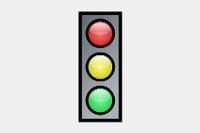

In [9]:
Red_Light_lyr = search[0]
Red_Light_lyr

In [ ]:
df = Red_Light_lyr.query(where="LATITUDE == ' ' ").df

In [10]:
Red_Light_lyr.url # lat long fiedls should be floats! check file.

'https://services9.arcgis.com/v7uCOYlOOr8zPbXL/arcgis/rest/services/Red_Light_Camera_Violations/FeatureServer'

In [11]:
Chicago_crime = gis.map('Chicago, IL', 8)
Chicago_crime.basemap = 'dark-gray-vector'

In [15]:
Chicago_crime

MapView(basemap='dark-gray-vector', jupyter_target='notebook', layout=Layout(height='400px', width='100%'), zo…